# Ошибка в запросе, т.к. в каждом матче не по 10 участников

In [1]:
import urllib2
import json
import random
import datetime

import math 
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt 
 
%matplotlib inline
plt.style.use('ggplot')

### Missings

In [2]:
def findColumnsWithNan(d):
    features = list(d)
    containsMissings = []
    for i in range(0, d.shape[1]):
        if d.iloc[:, i].count() < d.shape[0]:
            containsMissings.append(features[i])
    return containsMissings

## DataFrame print settings

In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 12)

# Sample

In [4]:
df = pd.read_csv('ABT_20_04_2017_withKills_onlyMajorParticipants.csv',
                                sep = ';',
                               dtype = {
                                   "account_id":"str",
                                    "assists":"int64",
                                    "attack_type_x":"object",
                                    "camps_stacked":"float64",
                                    "cluster":"object",
                                    "creeps_stacked":"float64",
                                    "deaths":"int64",
                                    "duration":"str",
                                    "first_blood_time":"int64",
                                    "gold_per_min":"int64",
                                    "gold_spent":"int64",
                                    "hero_damage":"int64",
                                    "hero_healing":"int64",
                                    "hero_id":"str",
                                    "leagueid":"str",
                                    "leaguename":"str",
                                    "localized_name_x":"object",
                                    "match_id":"str",
                                    "player_slot":"str",
                                    "primary_attr_x":"object",
                                    "start_time":"str",
                                    "stuns":"float64",
                                    "t_experience_cnt_10":"float64",
                                    "t_experience_cnt_12":"float64",
                                    "t_experience_cnt_15":"float64",
                                    "t_experience_cnt_20":"float64",
                                    "t_experience_cnt_25":"float64",
                                    "t_experience_cnt_3":"float64",
                                    "t_experience_cnt_30":"float64",
                                    "t_experience_cnt_5":"float64",
                                    "t_experience_cnt_8":"float64",
                                    "t_gold_cnt_10":"float64",
                                    "t_gold_cnt_12":"float64",
                                    "t_gold_cnt_15":"float64",
                                    "t_gold_cnt_20":"float64",
                                    "t_gold_cnt_25":"float64",
                                    "t_gold_cnt_3":"float64",
                                    "t_gold_cnt_30":"float64",
                                    "t_gold_cnt_5":"float64",
                                    "t_gold_cnt_8":"float64",
                                    "t_lasthits_cnt_10":"float64",
                                    "t_lasthits_cnt_12":"float64",
                                    "t_lasthits_cnt_15":"float64",
                                    "t_lasthits_cnt_20":"float64",
                                    "t_lasthits_cnt_25":"float64",
                                    "t_lasthits_cnt_3":"float64",
                                    "t_lasthits_cnt_30":"float64",
                                    "t_lasthits_cnt_5":"float64",
                                    "t_lasthits_cnt_8":"float64",
                                    "t_experience_rpm_10":"float64",
                                    "t_experience_rpm_12":"float64",
                                    "t_experience_rpm_15":"float64",
                                    "t_experience_rpm_20":"float64",
                                    "t_experience_rpm_25":"float64",
                                    "t_experience_rpm_3":"float64",
                                    "t_experience_rpm_30":"float64",
                                    "t_experience_rpm_5":"float64",
                                    "t_experience_rpm_8":"float64",
                                    "t_gold_rpm_10":"float64",
                                    "t_gold_rpm_12":"float64",
                                    "t_gold_rpm_15":"float64",
                                    "t_gold_rpm_20":"float64",
                                    "t_gold_rpm_25":"float64",
                                    "t_gold_rpm_3":"float64",
                                    "t_gold_rpm_30":"float64",
                                    "t_gold_rpm_5":"float64",
                                    "t_gold_rpm_8":"float64",
                                    "t_lasthits_rpm_10":"float64",
                                    "t_lasthits_rpm_12":"float64",
                                    "t_lasthits_rpm_15":"float64",
                                    "t_lasthits_rpm_20":"float64",
                                    "t_lasthits_rpm_25":"float64",
                                    "t_lasthits_rpm_3":"float64",
                                    "t_lasthits_rpm_30":"float64",
                                    "t_lasthits_rpm_5":"float64",
                                    "t_lasthits_rpm_8":"float64",
                                    "team_id":"str",
                                    "tower_damage":"int64",
                                    "win":"bool",
                                    "xp_per_min":"int64",
                                    "id_x":"str",
                                    "datetime":"str",
                                    "t_item_aether_lens":"float64",
                                    "t_item_arcane_boots":"float64",
                                    "t_item_black_king_bar":"float64",
                                    "t_item_blade_mail":"float64",
                                    "t_item_blink":"float64",
                                    "t_item_boots":"float64",
                                    "t_item_bottle":"float64",
                                    "t_item_desolator":"float64",
                                    "t_item_echo_sabre":"float64",
                                    "t_item_force_staff":"float64",
                                    "t_item_hand_of_midas":"float64",
                                    "t_item_hurricane_pike":"float64",
                                    "t_item_invis_sword":"float64",
                                    "t_item_magic_wand":"float64",
                                    "t_item_manta":"float64",
                                    "t_item_phase_boots":"float64",
                                    "t_item_power_treads":"float64",
                                    "t_item_ring_of_aquila":"float64",
                                    "t_item_silver_edge":"float64",
                                    "t_item_sphere":"float64",
                                    "t_item_tranquil_boots":"float64",
                                    "t_item_travel_boots":"float64",
                                    "t_item_ultimate_scepter":"float64",
                                    "t_item_wind_lace":"float64",
                                    "t_first_kill":"float64",
                                    "t_sen_cnt_5":"int64",
                                    "t_sen_cnt_10":"int64",
                                    "t_sen_cnt_12":"int64",
                                    "t_sen_cnt_15":"int64",
                                    "t_sen_cnt_25":"int64",
                                    "t_sen_cnt_3":"int64",
                                    "t_sen_cnt_20":"int64",
                                    "t_sen_cnt_30":"int64",
                                    "t_sen_cnt_8":"int64",
                                    "t_obs_cnt_15":"int64",
                                    "t_obs_cnt_8":"int64",
                                    "t_obs_cnt_25":"int64",
                                    "t_obs_cnt_10":"int64",
                                    "t_obs_cnt_12":"int64",
                                    "t_obs_cnt_20":"int64",
                                    "t_obs_cnt_3":"int64",
                                    "t_obs_cnt_5":"int64",
                                    "t_obs_cnt_30":"int64",
                                    "t_runes_cnt_3":"int64",
                                    "t_runes_cnt_10":"int64",
                                    "t_runes_cnt_12":"int64",
                                    "t_runes_cnt_5":"int64",
                                    "t_runes_cnt_15":"int64",
                                    "t_runes_cnt_20":"int64",
                                    "t_runes_cnt_8":"int64",
                                    "t_runes_cnt_30":"int64",
                                    "t_runes_cnt_25":"int64",
                                    "t_buyback_cnt_3":"int64",
                                    "t_buyback_cnt_10":"int64",
                                    "t_buyback_cnt_12":"int64",
                                    "t_buyback_cnt_5":"int64",
                                    "t_buyback_cnt_25":"int64",
                                    "t_buyback_cnt_15":"int64",
                                    "t_buyback_cnt_8":"int64",
                                    "t_buyback_cnt_30":"int64",
                                    "t_buyback_cnt_20":"int64",
                                    "t_sen_rpm_5":"float64",
                                    "t_sen_rpm_10":"float64",
                                    "t_sen_rpm_12":"float64",
                                    "t_sen_rpm_15":"float64",
                                    "t_sen_rpm_25":"float64",
                                    "t_sen_rpm_3":"float64",
                                    "t_sen_rpm_20":"float64",
                                    "t_sen_rpm_30":"float64",
                                    "t_sen_rpm_8":"float64",
                                    "t_obs_rpm_15":"float64",
                                    "t_obs_rpm_8":"float64",
                                    "t_obs_rpm_25":"float64",
                                    "t_obs_rpm_10":"float64",
                                    "t_obs_rpm_12":"float64",
                                    "t_obs_rpm_20":"float64",
                                    "t_obs_rpm_3":"float64",
                                    "t_obs_rpm_5":"float64",
                                    "t_obs_rpm_30":"float64",
                                    "t_runes_rpm_3":"float64",
                                    "t_runes_rpm_10":"float64",
                                    "t_runes_rpm_12":"float64",
                                    "t_runes_rpm_5":"float64",
                                    "t_runes_rpm_15":"float64",
                                    "t_runes_rpm_20":"float64",
                                    "t_runes_rpm_8":"float64",
                                    "t_runes_rpm_30":"float64",
                                    "t_runes_rpm_25":"float64",
                                    "t_buyback_rpm_3":"float64",
                                    "t_buyback_rpm_10":"float64",
                                    "t_buyback_rpm_12":"float64",
                                    "t_buyback_rpm_5":"float64",
                                    "t_buyback_rpm_25":"float64",
                                    "t_buyback_rpm_15":"float64",
                                    "t_buyback_rpm_8":"float64",
                                    "t_buyback_rpm_30":"float64",
                                    "t_buyback_rpm_20":"float64",
                                    "Carry":"object",
                                    "Disabler":"object",
                                    "Durable":"object",
                                    "Escape":"object",
                                    "Initiator":"object",
                                    "Jungler":"object",
                                    "Nuker":"object",
                                    "Pusher":"object",
                                    "Support":"object",
                                    "attack_type_y":"object",
                                    "id_y":"str",
                                    "localized_name_y":"object",
                                    "primary_attr_y":"object",
                                    "pro_ban":"float64",
                                    "pro_pick":"float64",
                                    "pro_win":"float64"
                               })

In [5]:
features = list(df)
target = 'win'

In [6]:
df

,Unnamed: 0,account_id,assists,attack_type_x,camps_stacked,cluster,creeps_stacked,deaths,denies,duration,first_blood_time,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,kills,last_hits,leagueid,leaguename,level,localized_name_x,match_id,player_slot,primary_attr_x,start_time,stuns,t_experience_cnt_10,t_experience_cnt_12,t_experience_cnt_15,t_experience_cnt_20,t_experience_cnt_25,t_experience_cnt_3,t_experience_cnt_30,t_experience_cnt_5,t_experience_cnt_8,t_gold_cnt_10,t_gold_cnt_12,t_gold_cnt_15,t_gold_cnt_20,t_gold_cnt_25,t_gold_cnt_3,t_gold_cnt_30,t_gold_cnt_5,t_gold_cnt_8,t_lasthits_cnt_10,t_lasthits_cnt_12,t_lasthits_cnt_15,t_lasthits_cnt_20,t_lasthits_cnt_25,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,team_id,tower_damage,win,xp_per_min,id_x,datetime,t_item_aether_lens,t_item_arcane_boots,t_item_black_king_bar,t_item_blade_mail,t_item_blink,t_item_boots,t_item_bottle,t_item_desolator,t_item_echo_sabre,t_item_force_staff,t_item_hand_of_midas,t_item_hurricane_pike,t_item_invis_sword,t_item_magic_wand,t_item_manta,...,t_runes_cnt_25,t_runes_cnt_3,t_runes_cnt_30,t_runes_cnt_5,t_runes_cnt_8,t_runes_rpm_10,t_runes_rpm_12,t_runes_rpm_15,t_runes_rpm_20,t_runes_rpm_25,t_runes_rpm_3,t_runes_rpm_30,t_runes_rpm_5,t_runes_rpm_8,t_buyback_cnt_10,t_buyback_cnt_12,t_buyback_cnt_15,t_buyback_cnt_20,t_buyback_cnt_25,t_buyback_cnt_3,t_buyback_cnt_30,t_buyback_cnt_5,t_buyback_cnt_8,t_buyback_rpm_10,t_buyback_rpm_12,t_buyback_rpm_15,t_buyback_rpm_20,t_buyback_rpm_25,t_buyback_rpm_3,t_buyback_rpm_30,t_buyback_rpm_5,t_buyback_rpm_8,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support,attack_type_y,id_y,localized_name_y,primary_attr_y,pro_ban,pro_pick,pro_win,t_experience_rpm_3,t_experience_rpm_5,t_experience_rpm_8,t_experience_rpm_10,t_experience_rpm_12,t_experience_rpm_15,t_experience_rpm_20,t_experience_rpm_25,t_experience_rpm_30,t_gold_rpm_3,t_gold_rpm_5,t_gold_rpm_8,t_gold_rpm_10,t_gold_rpm_12,t_gold_rpm_15,t_gold_rpm_20,t_gold_rpm_25,t_gold_rpm_30,t_lasthits_rpm_3,t_lasthits_rpm_5,t_lasthits_rpm_8,t_lasthits_rpm_10,t_lasthits_rpm_12,t_lasthits_rpm_15,t_lasthits_rpm_20,t_lasthits_rpm_25,t_lasthits_rpm_30
0,0,88553213,16,Ranged,0.0,224,0.0,3,0,2983,4,270,13670,9270,7811,58,4,80,4546,H-CUP,18,Enchantress,3122034132,129,int,1492346338,1.632930,1141.0,1933.0,3528.0,5400.0,6411.0,304.0,7445.0,748.0,995.0,1642.0,2254.0,3132.0,4614.0,5454.0,511.0,6140.0,1010.0,1407.0,10.0,15.0,30.0,41.0,52.0,3.0,55.0,7.0,9.0,1375614,669,False,283,3122034132_88553213,16.04.2017 15:38:58,NaN,NaN,NaN,NaN,NaN,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,678.0,NaN,...,6,1,7,1,2,0.2,0.250000,0.266667,0.30,0.24,0.333333,0.233333,0.2,0.250,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,1,1,Ranged,58,Enchantress,int,9.0,12.0,5.0,101.333333,149.6,124.375,114.1,161.083333,235.200000,270.00,256.44,248.166667,170.333333,202.0,175.875,164.2,187.833333,208.800000,230.70,218.16,204.666667,1.000000,1.4,1.125,1.0,1.250000,2.000000,2.05,2.08,1.833333
1,1,106809101,8,Ranged,0.0,138,0.0,5,1,2398,116,371,11280,20339,792,58,9,129,5227,ProDotA Cup by Azubu,21,Enchantress,3083918410,131,int,1490727823,9.370850,2579.0,2840.0,3635.0,5534.0,8594.0,401.0,12338.0,744.0,2118.0,2584.0,2940.0,3849.0,5474.0,7883.0,460.0,9935.0,819.0,2005.0,34.0,39.0,43.0,58.0,71.0,8.0,91.0,14.0,23.0,1883502,1428,False,492,3083918410_106809101,28.03.2017 22:03:43,NaN,NaN,NaN,NaN,NaN,307.0,NaN,NaN,NaN,1161.0,NaN,1214.0,NaN,NaN,NaN,...,8,2,9,3,4,0.4,0.416667,0.333333,0.25,0.32,0.666667,0.300000,0.6,0.500,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,1,1,Ranged,58,Enchantress,int,9.0,12.0,5.0,133.666667,148.8,264.750,257.9,236.666667,242.333333,276.70,343.76,411.266667,153.333333,163.8,250.625,258.4,245.000000,256.600000,273.70,315.32,331.166667,2.666667,2.8,2.875,3.4,3.250000,2.866667,2.90,2.84,3.033333
2,2,106809101,3,Ranged,2.0,186,7.0,2,0,1274,163,437,7045,4282,210,58,3,71,5157,Kiev Major,12,Enchantress,3051652031,4,int,1489339762,14

In [7]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']

In [8]:
id_columns = [  'account_id',    
                'duration', 
                'hero_id',
                'leagueid',                          
                'leaguename',
                'match_id',
                'player_slot',
                'start_time',
                'team_id',
                'id_x',
                'datetime',
                'attack_type_y',
                'id_y',
                'localized_name_y',
                'primary_attr_y',
                'Unnamed: 0'
            ]
categorical_columns = [x for x in categorical_columns if x not in id_columns]
numerical_columns = [x for x in numerical_columns if x not in id_columns]

# EXPLORE

In [9]:
df[categorical_columns].describe()

,attack_type_x,cluster,localized_name_x,primary_attr_x,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support
count,4349,4349,4349,4349,4349,4349,4349,4349,4349,4349,4349,4349,4349
unique,2,27,110,3,2,2,2,2,2,2,2,2,2
top,Melee,224,Rubick,int,0,1,0,1,0,0,1,0,0
freq,2260,2275,183,1569,2244,3381,2808,2189,2223,3570,3022,3578,2841


In [10]:
for c in categorical_columns:
    print c,'= ',df[c].unique()

attack_type_x =  ['Ranged' 'Melee']
cluster =  ['224' '138' '186' '183' '156' '155' '152' '184' '137' '132' '154' '121'
 '136' '131' '151' '133' '153' '123' '122' '135' '201' '202' '181' '182'
 '134' '187' '188']
localized_name_x =  ['Enchantress' 'Witch Doctor' 'Abaddon' 'Vengeful Spirit' 'Lina' 'Rubick'
 'Crystal Maiden' 'Magnus' 'Juggernaut' 'Warlock' 'Nyx Assassin' 'Invoker'
 'Silencer' 'Lifestealer' 'Tinker' 'Night Stalker' 'Legion Commander'
 'Pudge' 'Ember Spirit' 'Puck' 'Earth Spirit' 'Morphling' 'Bounty Hunter'
 'Beastmaster' 'Slardar' 'Templar Assassin' 'Disruptor' 'Sven' 'Riki'
 'Undying' 'Wraith King' 'Shadow Fiend' 'Ogre Magi' 'Alchemist' 'Clockwerk'
 'Dazzle' 'Spectre' 'Ursa' 'Slark' 'Sand King' 'Tidehunter' 'Lion'
 'Omniknight' 'Weaver' 'Centaur Warrunner' 'Oracle' 'Batrider'
 'Broodmother' 'Kunkka' 'Anti-Mage' 'Keeper of the Light' 'Naga Siren'
 'Tiny' 'Treant Protector' 'Timbersaw' 'Death Prophet' 'Queen of Pain'
 'Lich' 'Sniper' 'Winter Wyvern' 'Storm Spirit' 'Earthsh

In [11]:
df[numerical_columns].describe()

C:\Program Files (x86)\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,assists,camps_stacked,creeps_stacked,deaths,denies,first_blood_time,gold_per_min,gold_spent,hero_damage,hero_healing,kills,last_hits,level,stuns,t_experience_cnt_10,t_experience_cnt_12,t_experience_cnt_15,t_experience_cnt_20,t_experience_cnt_25,t_experience_cnt_3,t_experience_cnt_30,t_experience_cnt_5,t_experience_cnt_8,t_gold_cnt_10,t_gold_cnt_12,t_gold_cnt_15,t_gold_cnt_20,t_gold_cnt_25,t_gold_cnt_3,t_gold_cnt_30,t_gold_cnt_5,t_gold_cnt_8,t_lasthits_cnt_10,t_lasthits_cnt_12,t_lasthits_cnt_15,t_lasthits_cnt_20,t_lasthits_cnt_25,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,tower_damage,xp_per_min,t_item_aether_lens,t_item_arcane_boots,t_item_black_king_bar,t_item_blade_mail,t_item_blink,t_item_boots,t_item_bottle,t_item_desolator,t_item_echo_sabre,t_item_force_staff,t_item_hand_of_midas,t_item_hurricane_pike,t_item_invis_sword,t_item_magic_wand,t_item_manta,t_item_phase_boots,t_item_power_treads,t_item_ring_of_aquila,t_item_silver_edge,t_item_sphere,t_item_tranquil_boots,t_item_travel_boots,t_item_ultimate_scepter,t_item_wind_lace,t_first_kill,t_sen_cnt_10,t_sen_cnt_12,t_sen_cnt_15,t_sen_cnt_20,t_sen_cnt_25,t_sen_cnt_3,t_sen_cnt_30,...,t_obs_rpm_10,t_obs_rpm_12,t_obs_rpm_15,t_obs_rpm_20,t_obs_rpm_25,t_obs_rpm_3,t_obs_rpm_30,t_obs_rpm_5,t_obs_rpm_8,t_runes_cnt_10,t_runes_cnt_12,t_runes_cnt_15,t_runes_cnt_20,t_runes_cnt_25,t_runes_cnt_3,t_runes_cnt_30,t_runes_cnt_5,t_runes_cnt_8,t_runes_rpm_10,t_runes_rpm_12,t_runes_rpm_15,t_runes_rpm_20,t_runes_rpm_25,t_runes_rpm_3,t_runes_rpm_30,t_runes_rpm_5,t_runes_rpm_8,t_buyback_cnt_10,t_buyback_cnt_12,t_buyback_cnt_15,t_buyback_cnt_20,t_buyback_cnt_25,t_buyback_cnt_3,t_buyback_cnt_30,t_buyback_cnt_5,t_buyback_cnt_8,t_buyback_rpm_10,t_buyback_rpm_12,t_buyback_rpm_15,t_buyback_rpm_20,t_buyback_rpm_25,t_buyback_rpm_3,t_buyback_rpm_30,t_buyback_rpm_5,t_buyback_rpm_8,pro_ban,pro_pick,pro_win,t_experience_rpm_3,t_experience_rpm_5,t_experience_rpm_8,t_experience_rpm_10,t_experience_rpm_12,t_experience_rpm_15,t_experience_rpm_20,t_experience_rpm_25,t_experience_rpm_30,t_gold_rpm_3,t_gold_rpm_5,t_gold_rpm_8,t_gold_rpm_10,t_gold_rpm_12,t_gold_rpm_15,t_gold_rpm_20,t_gold_rpm_25,t_gold_rpm_30,t_lasthits_rpm_3,t_lasthits_rpm_5,t_lasthits_rpm_8,t_lasthits_rpm_10,t_lasthits_rpm_12,t_lasthits_rpm_15,t_lasthits_rpm_20,t_lasthits_rpm_25,t_lasthits_rpm_30
count,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4340.000000,4253.000000,4349.000000,3895.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4340.000000,4253.000000,4349.000000,3895.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4340.000000,4253.000000,4349.000000,3895.000000,4349.000000,4349.000000,4349.000000,4349.000000,84.000000,1059.000000,501.000000,178.000000,1689.000000,4184.000000,765.000000,210.000000,103.000000,675.000000,595.000000,177.000000,251.000000,2324.000000,367.000000,676.000000,818.000000,735.000000,75.000000,177.000000,1119.000000,408.000000,366.000000,1136.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,...,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.0,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.00000,4349.000000,4349.0,4349.000000,4349.000000,4349.000000,4338.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4340.000000,4253.000000,3895.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4340.000000,4253.000000,

In [12]:
df[numerical_columns].corr()

,assists,camps_stacked,creeps_stacked,deaths,denies,first_blood_time,gold_per_min,gold_spent,hero_damage,hero_healing,kills,last_hits,level,stuns,t_experience_cnt_10,t_experience_cnt_12,t_experience_cnt_15,t_experience_cnt_20,t_experience_cnt_25,t_experience_cnt_3,t_experience_cnt_30,t_experience_cnt_5,t_experience_cnt_8,t_gold_cnt_10,t_gold_cnt_12,t_gold_cnt_15,t_gold_cnt_20,t_gold_cnt_25,t_gold_cnt_3,t_gold_cnt_30,t_gold_cnt_5,t_gold_cnt_8,t_lasthits_cnt_10,t_lasthits_cnt_12,t_lasthits_cnt_15,t_lasthits_cnt_20,t_lasthits_cnt_25,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,tower_damage,win,xp_per_min,t_item_aether_lens,t_item_arcane_boots,t_item_black_king_bar,t_item_blade_mail,t_item_blink,t_item_boots,t_item_bottle,t_item_desolator,t_item_echo_sabre,t_item_force_staff,t_item_hand_of_midas,t_item_hurricane_pike,t_item_invis_sword,t_item_magic_wand,t_item_manta,t_item_phase_boots,t_item_power_treads,t_item_ring_of_aquila,t_item_silver_edge,t_item_sphere,t_item_tranquil_boots,t_item_travel_boots,t_item_ultimate_scepter,t_item_wind_lace,t_first_kill,t_sen_cnt_10,t_sen_cnt_12,t_sen_cnt_15,t_sen_cnt_20,t_sen_cnt_25,t_sen_cnt_3,...,t_obs_rpm_10,t_obs_rpm_12,t_obs_rpm_15,t_obs_rpm_20,t_obs_rpm_25,t_obs_rpm_3,t_obs_rpm_30,t_obs_rpm_5,t_obs_rpm_8,t_runes_cnt_10,t_runes_cnt_12,t_runes_cnt_15,t_runes_cnt_20,t_runes_cnt_25,t_runes_cnt_3,t_runes_cnt_30,t_runes_cnt_5,t_runes_cnt_8,t_runes_rpm_10,t_runes_rpm_12,t_runes_rpm_15,t_runes_rpm_20,t_runes_rpm_25,t_runes_rpm_3,t_runes_rpm_30,t_runes_rpm_5,t_runes_rpm_8,t_buyback_cnt_10,t_buyback_cnt_12,t_buyback_cnt_15,t_buyback_cnt_20,t_buyback_cnt_25,t_buyback_cnt_3,t_buyback_cnt_30,t_buyback_cnt_5,t_buyback_cnt_8,t_buyback_rpm_10,t_buyback_rpm_12,t_buyback_rpm_15,t_buyback_rpm_20,t_buyback_rpm_25,t_buyback_rpm_3,t_buyback_rpm_30,t_buyback_rpm_5,t_buyback_rpm_8,pro_ban,pro_pick,pro_win,t_experience_rpm_3,t_experience_rpm_5,t_experience_rpm_8,t_experience_rpm_10,t_experience_rpm_12,t_experience_rpm_15,t_experience_rpm_20,t_experience_rpm_25,t_experience_rpm_30,t_gold_rpm_3,t_gold_rpm_5,t_gold_rpm_8,t_gold_rpm_10,t_gold_rpm_12,t_gold_rpm_15,t_gold_rpm_20,t_gold_rpm_25,t_gold_rpm_30,t_lasthits_rpm_3,t_lasthits_rpm_5,t_lasthits_rpm_8,t_lasthits_rpm_10,t_lasthits_rpm_12,t_lasthits_rpm_15,t_lasthits_rpm_20,t_lasthits_rpm_25,t_lasthits_rpm_30
assists,1.000000,0.035429,0.040621,0.071316,-0.164910,-0.056813,-0.023160,0.152078,0.189856,0.231977,0.085503,-0.038761,0.347605,0.261680,-0.194423,-0.198037,-0.193886,-0.158140,-0.101027,-0.178112,-0.052801,-0.186353,-0.188366,-0.183640,-0.192621,-0.202161,-0.197336,-0.176368,-0.167140,-0.150212,-0.173444,-0.179767,-0.229684,-0.238342,-0.249082,-0.249901,-0.245753,-0.195914,-0.238407,-0.207803,-0.221625,-0.005547,0.479163,0.101058,0.059805,0.052895,0.123175,-0.023844,0.042349,-0.024360,-0.013772,0.157452,0.011477,0.205647,0.258758,0.132526,0.286855,0.103509,0.178093,0.148855,0.132784,0.078068,0.203372,0.114509,-0.030536,0.022222,0.207926,0.040248,0.054279,0.138304,0.144309,0.147571,0.143445,0.143626,0.094614,...,0.160251,0.161360,0.166650,0.164245,0.166380,0.136688,0.172497,0.137945,0.162589,0.040450,0.026281,0.007911,0.004494,0.010925,-0.028691,0.038884,0.040150,0.055206,0.040450,0.026281,0.007911,0.004494,0.010925,-0.028691,0.038884,0.040150,0.055206,0.014890,0.013684,0.047192,0.036252,-0.002894,NaN,-0.074622,0.008027,0.014890,0.014890,0.013684,0.047192,0.036252,-0.002894,NaN,-0.074622,0.008027,0.014890,-0.070061,0.017572,0.019595,-0.178112,-0.186353,-0.188366,-0.194423,-0.198037,-0.193886,-0.158140,-0.101027,-0.052801,-0.167140,-0.173444,-0.179767,-0.183640,-0.192621,-0.202161,-0.197336,-0.176368,-0.150212,-0.195914,-0.207803,-0.221625,-0.229684,-0.238342,-0.249082,-0.249901,-0.245753,-0.238407
camps_stacked,0.035429,1.000000,0.949268,0.025174,-0.181712,0.061851,-0.096277,-0.051153,-0.085659,0.119371,-0.126559,-0.081739,-0.073360,-0.046204,-0.155232,-0.135631,-0.138955,-0.137566,-0.129965,-0.146287,-0.126860,-0.159165,-0.162745,-0.14676

# Modify

## Binarization

In [13]:
df_dummies = pd.get_dummies(df[categorical_columns])
binary_columns = list(df_dummies)

In [14]:
df = pd.concat([df, df_dummies], axis = 1)

## Heroes Popularity

In [15]:
heroPopularity = dict()
heroPopularityList = []
for f in list(df):
    popularity = 0
    if f.find('localized_name_') != -1 and f != 'localized_name_x' and f != 'localized_name_y':
        popularity = df[f].sum()
        heroPopularity[f] = popularity
from operator import itemgetter
heroPopularityList = sorted(heroPopularity.items(), key=itemgetter(1), reverse=True)

In [16]:
heroPopularityList

[('localized_name_x_Rubick', 183.0),
 ('localized_name_x_Juggernaut', 165.0),
 ('localized_name_x_Slardar', 164.0),
 ('localized_name_x_Earth Spirit', 163.0),
 ('localized_name_x_Centaur Warrunner', 144.0),
 ('localized_name_x_Ember Spirit', 141.0),
 ('localized_name_x_Crystal Maiden', 133.0),
 ('localized_name_x_Lifestealer', 117.0),
 ('localized_name_x_Warlock', 113.0),
 ('localized_name_x_Weaver', 109.0),
 ('localized_name_x_Vengeful Spirit', 107.0),
 ('localized_name_x_Sand King', 98.0),
 ('localized_name_x_Invoker', 96.0),
 ('localized_name_x_Ogre Magi', 86.0),
 ('localized_name_x_Nyx Assassin', 81.0),
 ('localized_name_x_Dark Seer', 80.0),
 ('localized_name_x_Magnus', 77.0),
 ('localized_name_x_Shadow Fiend', 77.0),
 ('localized_name_x_Dazzle', 77.0),
 ('localized_name_x_Legion Commander', 77.0),
 ('localized_name_x_Lina', 73.0),
 ('localized_name_x_Disruptor', 70.0),
 ('localized_name_x_Luna', 67.0),
 ('localized_name_x_Batrider', 66.0),
 ('localized_name_x_Keeper of the Light',

## Missings

In [17]:
NanColumns = findColumnsWithNan(df)

In [18]:
NanColumns

['t_experience_cnt_20',
 't_experience_cnt_25',
 't_experience_cnt_30',
 't_gold_cnt_20',
 't_gold_cnt_25',
 't_gold_cnt_30',
 't_lasthits_cnt_20',
 't_lasthits_cnt_25',
 't_lasthits_cnt_30',
 't_item_aether_lens',
 't_item_arcane_boots',
 't_item_black_king_bar',
 't_item_blade_mail',
 't_item_blink',
 't_item_boots',
 't_item_bottle',
 't_item_desolator',
 't_item_echo_sabre',
 't_item_force_staff',
 't_item_hand_of_midas',
 't_item_hurricane_pike',
 't_item_invis_sword',
 't_item_magic_wand',
 't_item_manta',
 't_item_phase_boots',
 't_item_power_treads',
 't_item_ring_of_aquila',
 't_item_silver_edge',
 't_item_sphere',
 't_item_tranquil_boots',
 't_item_travel_boots',
 't_item_ultimate_scepter',
 't_item_wind_lace',
 'pro_ban',
 't_experience_rpm_20',
 't_experience_rpm_25',
 't_experience_rpm_30',
 't_gold_rpm_20',
 't_gold_rpm_25',
 't_gold_rpm_30',
 't_lasthits_rpm_20',
 't_lasthits_rpm_25',
 't_lasthits_rpm_30']

In [19]:
df = df.fillna(df.mean())

In [20]:
findColumnsWithNan(df)

[]

## Data Partition

In [21]:
if target in categorical_columns:
    categorical_columns.remove(target)
    print "Removed from categorical"
if target in numerical_columns:
    numerical_columns.remove(target)
    print "Removed from numerical"
if target in binary_columns:
    binary_columns.remove(target)
    print "Removed from numerical"

Removed from numerical


In [22]:
X = pd.concat([df[numerical_columns], df[binary_columns]], axis = 1)
y = df[target]

In [23]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print N_train, N_test

3044 1305


C:\Program Files (x86)\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Drop List

In [24]:
clusterVars = []
for f in list(X_train):
    if f.find('cluster') != -1:
        clusterVars.append(f)
clusterVars

['cluster_121',
 'cluster_122',
 'cluster_123',
 'cluster_131',
 'cluster_132',
 'cluster_133',
 'cluster_134',
 'cluster_135',
 'cluster_136',
 'cluster_137',
 'cluster_138',
 'cluster_151',
 'cluster_152',
 'cluster_153',
 'cluster_154',
 'cluster_155',
 'cluster_156',
 'cluster_181',
 'cluster_182',
 'cluster_183',
 'cluster_184',
 'cluster_186',
 'cluster_187',
 'cluster_188',
 'cluster_201',
 'cluster_202',
 'cluster_224']

## Normalization [0,1]

In [25]:
X_train_norm = X_train[numerical_columns].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
X_test_norm = X_test[numerical_columns].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [26]:
X_train_norm = pd.concat([X_train[binary_columns], X_train_norm], axis = 1)
X_test_norm = pd.concat([X_test[binary_columns], X_test_norm], axis = 1)
print X_train_norm.shape, X_test_norm.shape

(3044, 330) (1305, 330)


In [27]:
trainColumnsWithNan = findColumnsWithNan(X_train_norm)
testColumnsWithNan = findColumnsWithNan(X_test_norm)
ColumnsWithNan = trainColumnsWithNan
for col in testColumnsWithNan:
    if col not in trainColumnsWithNan:
        ColumnsWithNan.append(col)
print ColumnsWithNan

['t_buyback_cnt_3', 't_buyback_cnt_5', 't_buyback_rpm_3', 't_buyback_rpm_5']


In [28]:
X_train_norm = X_train_norm.drop(ColumnsWithNan, axis = 1)
X_test_norm = X_test_norm.drop(ColumnsWithNan, axis = 1)

## Outliers detection

In [29]:
from sklearn.ensemble import IsolationForest

isNotOutlier = IsolationForest(contamination = 0.01)
isNotOutlier.fit(X_train_norm)

IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [30]:
X_train_norm_filtered = X_train_norm[isNotOutlier.predict(X_train_norm) == 1]
y_train_filtered = y_train[isNotOutlier.predict(X_train_norm) == 1]

In [31]:
print X_train_norm_filtered.shape, y_train_filtered.shape

(3013, 326) (3013L,)


# Model

## Regression

In [32]:
X_train_norm_filtered.drop(clusterVars, axis = 1, inplace = True)
X_test_norm.drop(clusterVars, axis = 1, inplace = True)

C:\Program Files (x86)\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lm = LogisticRegression(penalty = 'l1', C = 1, fit_intercept=False)
lm.fit(X_train_norm_filtered, y_train_filtered)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Assess

In [34]:
X_train_norm_filtered.shape, X_test_norm.shape

((3013, 299), (1305, 299))

In [35]:
print "Train accuracy = %s" %metrics.accuracy_score(y_train_filtered, lm.predict(X_train_norm_filtered))
print "Test accuracy = %s" %metrics.accuracy_score(y_test, lm.predict(X_test_norm))

print "Train AUC = %s" %metrics.roc_auc_score(y_train_filtered, lm.predict_proba(X_train_norm_filtered)[:,1])
print "Test AUC = %s" %metrics.roc_auc_score(y_test, lm.predict_proba(X_test_norm)[:,1])

print "Train Recall = %s" %metrics.recall_score(y_train_filtered, lm.predict(X_train_norm_filtered))
print "Test Recall = %s" %metrics.recall_score(y_test, lm.predict(X_test_norm))

print "Train Precision = %s" %metrics.precision_score(y_train_filtered, lm.predict(X_train_norm_filtered))
print "Test Precision = %s" %metrics.precision_score(y_test, lm.predict(X_test_norm))

Train accuracy = 0.938267507468
Test accuracy = 0.934865900383
Train AUC = 0.983509834892
Test AUC = 0.976305689137
Train Recall = 0.955085183273
Test Recall = 0.949631449631
Train Precision = 0.949204720369
Test Precision = 0.946144430845


In [36]:
try:
    del importanceLM
except Exception:
    print 'importanceLM does not exists'
importanceLM = dict()
for i in range(lm.coef_.shape[1]):
    importanceLM[list(X_train_norm_filtered)[i]] = lm.coef_.tolist()[0][i]
from operator import itemgetter
featureImportanceLM = sorted(importanceLM.items(), key=itemgetter(1), reverse=True)
print 'importanceLM has been created'

importanceLM does not exists
importanceLM has been created


In [37]:
featureImportanceLM

[('gold_per_min', 36.26770247766221),
 ('assists', 13.920834177690955),
 ('tower_damage', 7.555296640514067),
 ('kills', 4.273792770584814),
 ('localized_name_x_Tinker', 2.1936328413905906),
 ('localized_name_x_Legion Commander', 1.860045889314234),
 ('localized_name_x_Oracle', 1.689275210252069),
 ('localized_name_x_Timbersaw', 1.0736173267984364),
 ('t_item_wind_lace', 0.9890390236471394),
 ('localized_name_x_Vengeful Spirit', 0.746476514914151),
 ('localized_name_x_Abaddon', 0.712306935944924),
 ('localized_name_x_Slardar', 0.6676152392857273),
 ('localized_name_x_Ember Spirit', 0.5583277850711579),
 ('localized_name_x_Treant Protector', 0.5520795093184792),
 ('localized_name_x_Sand King', 0.4390956040821615),
 ('t_first_kill', 0.382591854274424),
 ('primary_attr_x_str', 0.3252132880733864),
 ('t_experience_cnt_10', 0.2810094668919337),
 ('t_experience_cnt_3', 0.2759817138636379),
 ('t_item_tranquil_boots', 0.2604287963663573),
 ('localized_name_x_Keeper of the Light', 0.20988256115

In [38]:
heroImportanceLM = []
heroDict = {}
for i in range(len(featureImportanceLM)):
    if featureImportanceLM[i][0].find('localized_name_x') != -1:
        heroDict[featureImportanceLM[i][0]] = featureImportanceLM[i][1]
heroImportanceLM = sorted(heroDict.items(), key=itemgetter(1), reverse=True)        

In [39]:
heroImportanceLM

[('localized_name_x_Tinker', 2.1936328413905906),
 ('localized_name_x_Legion Commander', 1.860045889314234),
 ('localized_name_x_Oracle', 1.689275210252069),
 ('localized_name_x_Timbersaw', 1.0736173267984364),
 ('localized_name_x_Vengeful Spirit', 0.746476514914151),
 ('localized_name_x_Abaddon', 0.712306935944924),
 ('localized_name_x_Slardar', 0.6676152392857273),
 ('localized_name_x_Ember Spirit', 0.5583277850711579),
 ('localized_name_x_Treant Protector', 0.5520795093184792),
 ('localized_name_x_Sand King', 0.4390956040821615),
 ('localized_name_x_Keeper of the Light', 0.20988256115032614),
 ('localized_name_x_Crystal Maiden', 0.1811234214675191),
 ('localized_name_x_Io', 0.1290225130122433),
 ('localized_name_x_Shadow Demon', 0.11488607582711555),
 ('localized_name_x_Axe', 0.10695385127967245),
 ('localized_name_x_Nyx Assassin', 0.05802950374698684),
 ('localized_name_x_Outworld Devourer', 0.01959846065318913),
 ('localized_name_x_Winter Wyvern', 0.002485707272677172),
 ('localiz

# Scoring

In [40]:
sdf = pd.read_csv('ABT_20_04_2017_withKills_onlyMajorParticipants.csv',
                                sep = ';',
                               dtype = {
                                   "account_id":"str",
                                    "assists":"int64",
                                    "attack_type_x":"object",
                                    "camps_stacked":"float64",
                                    "cluster":"object",
                                    "creeps_stacked":"float64",
                                    "deaths":"int64",
                                    "duration":"str",
                                    "first_blood_time":"int64",
                                    "gold_per_min":"int64",
                                    "gold_spent":"int64",
                                    "hero_damage":"int64",
                                    "hero_healing":"int64",
                                    "hero_id":"str",
                                    "leagueid":"str",
                                    "leaguename":"str",
                                    "localized_name_x":"object",
                                    "match_id":"str",
                                    "player_slot":"str",
                                    "primary_attr_x":"object",
                                    "start_time":"str",
                                    "stuns":"float64",
                                    "t_experience_cnt_10":"float64",
                                    "t_experience_cnt_12":"float64",
                                    "t_experience_cnt_15":"float64",
                                    "t_experience_cnt_20":"float64",
                                    "t_experience_cnt_25":"float64",
                                    "t_experience_cnt_3":"float64",
                                    "t_experience_cnt_30":"float64",
                                    "t_experience_cnt_5":"float64",
                                    "t_experience_cnt_8":"float64",
                                    "t_gold_cnt_10":"float64",
                                    "t_gold_cnt_12":"float64",
                                    "t_gold_cnt_15":"float64",
                                    "t_gold_cnt_20":"float64",
                                    "t_gold_cnt_25":"float64",
                                    "t_gold_cnt_3":"float64",
                                    "t_gold_cnt_30":"float64",
                                    "t_gold_cnt_5":"float64",
                                    "t_gold_cnt_8":"float64",
                                    "t_lasthits_cnt_10":"float64",
                                    "t_lasthits_cnt_12":"float64",
                                    "t_lasthits_cnt_15":"float64",
                                    "t_lasthits_cnt_20":"float64",
                                    "t_lasthits_cnt_25":"float64",
                                    "t_lasthits_cnt_3":"float64",
                                    "t_lasthits_cnt_30":"float64",
                                    "t_lasthits_cnt_5":"float64",
                                    "t_lasthits_cnt_8":"float64",
                                    "t_experience_rpm_10":"float64",
                                    "t_experience_rpm_12":"float64",
                                    "t_experience_rpm_15":"float64",
                                    "t_experience_rpm_20":"float64",
                                    "t_experience_rpm_25":"float64",
                                    "t_experience_rpm_3":"float64",
                                    "t_experience_rpm_30":"float64",
                                    "t_experience_rpm_5":"float64",
                                    "t_experience_rpm_8":"float64",
                                    "t_gold_rpm_10":"float64",
                                    "t_gold_rpm_12":"float64",
                                    "t_gold_rpm_15":"float64",
                                    "t_gold_rpm_20":"float64",
                                    "t_gold_rpm_25":"float64",
                                    "t_gold_rpm_3":"float64",
                                    "t_gold_rpm_30":"float64",
                                    "t_gold_rpm_5":"float64",
                                    "t_gold_rpm_8":"float64",
                                    "t_lasthits_rpm_10":"float64",
                                    "t_lasthits_rpm_12":"float64",
                                    "t_lasthits_rpm_15":"float64",
                                    "t_lasthits_rpm_20":"float64",
                                    "t_lasthits_rpm_25":"float64",
                                    "t_lasthits_rpm_3":"float64",
                                    "t_lasthits_rpm_30":"float64",
                                    "t_lasthits_rpm_5":"float64",
                                    "t_lasthits_rpm_8":"float64",
                                    "team_id":"str",
                                    "tower_damage":"int64",
                                    "win":"bool",
                                    "xp_per_min":"int64",
                                    "id_x":"str",
                                    "datetime":"str",
                                    "t_item_aether_lens":"float64",
                                    "t_item_arcane_boots":"float64",
                                    "t_item_black_king_bar":"float64",
                                    "t_item_blade_mail":"float64",
                                    "t_item_blink":"float64",
                                    "t_item_boots":"float64",
                                    "t_item_bottle":"float64",
                                    "t_item_desolator":"float64",
                                    "t_item_echo_sabre":"float64",
                                    "t_item_force_staff":"float64",
                                    "t_item_hand_of_midas":"float64",
                                    "t_item_hurricane_pike":"float64",
                                    "t_item_invis_sword":"float64",
                                    "t_item_magic_wand":"float64",
                                    "t_item_manta":"float64",
                                    "t_item_phase_boots":"float64",
                                    "t_item_power_treads":"float64",
                                    "t_item_ring_of_aquila":"float64",
                                    "t_item_silver_edge":"float64",
                                    "t_item_sphere":"float64",
                                    "t_item_tranquil_boots":"float64",
                                    "t_item_travel_boots":"float64",
                                    "t_item_ultimate_scepter":"float64",
                                    "t_item_wind_lace":"float64",
                                    "t_first_kill":"float64",
                                    "t_sen_cnt_5":"int64",
                                    "t_sen_cnt_10":"int64",
                                    "t_sen_cnt_12":"int64",
                                    "t_sen_cnt_15":"int64",
                                    "t_sen_cnt_25":"int64",
                                    "t_sen_cnt_3":"int64",
                                    "t_sen_cnt_20":"int64",
                                    "t_sen_cnt_30":"int64",
                                    "t_sen_cnt_8":"int64",
                                    "t_obs_cnt_15":"int64",
                                    "t_obs_cnt_8":"int64",
                                    "t_obs_cnt_25":"int64",
                                    "t_obs_cnt_10":"int64",
                                    "t_obs_cnt_12":"int64",
                                    "t_obs_cnt_20":"int64",
                                    "t_obs_cnt_3":"int64",
                                    "t_obs_cnt_5":"int64",
                                    "t_obs_cnt_30":"int64",
                                    "t_runes_cnt_3":"int64",
                                    "t_runes_cnt_10":"int64",
                                    "t_runes_cnt_12":"int64",
                                    "t_runes_cnt_5":"int64",
                                    "t_runes_cnt_15":"int64",
                                    "t_runes_cnt_20":"int64",
                                    "t_runes_cnt_8":"int64",
                                    "t_runes_cnt_30":"int64",
                                    "t_runes_cnt_25":"int64",
                                    "t_buyback_cnt_3":"int64",
                                    "t_buyback_cnt_10":"int64",
                                    "t_buyback_cnt_12":"int64",
                                    "t_buyback_cnt_5":"int64",
                                    "t_buyback_cnt_25":"int64",
                                    "t_buyback_cnt_15":"int64",
                                    "t_buyback_cnt_8":"int64",
                                    "t_buyback_cnt_30":"int64",
                                    "t_buyback_cnt_20":"int64",
                                    "t_sen_rpm_5":"float64",
                                    "t_sen_rpm_10":"float64",
                                    "t_sen_rpm_12":"float64",
                                    "t_sen_rpm_15":"float64",
                                    "t_sen_rpm_25":"float64",
                                    "t_sen_rpm_3":"float64",
                                    "t_sen_rpm_20":"float64",
                                    "t_sen_rpm_30":"float64",
                                    "t_sen_rpm_8":"float64",
                                    "t_obs_rpm_15":"float64",
                                    "t_obs_rpm_8":"float64",
                                    "t_obs_rpm_25":"float64",
                                    "t_obs_rpm_10":"float64",
                                    "t_obs_rpm_12":"float64",
                                    "t_obs_rpm_20":"float64",
                                    "t_obs_rpm_3":"float64",
                                    "t_obs_rpm_5":"float64",
                                    "t_obs_rpm_30":"float64",
                                    "t_runes_rpm_3":"float64",
                                    "t_runes_rpm_10":"float64",
                                    "t_runes_rpm_12":"float64",
                                    "t_runes_rpm_5":"float64",
                                    "t_runes_rpm_15":"float64",
                                    "t_runes_rpm_20":"float64",
                                    "t_runes_rpm_8":"float64",
                                    "t_runes_rpm_30":"float64",
                                    "t_runes_rpm_25":"float64",
                                    "t_buyback_rpm_3":"float64",
                                    "t_buyback_rpm_10":"float64",
                                    "t_buyback_rpm_12":"float64",
                                    "t_buyback_rpm_5":"float64",
                                    "t_buyback_rpm_25":"float64",
                                    "t_buyback_rpm_15":"float64",
                                    "t_buyback_rpm_8":"float64",
                                    "t_buyback_rpm_30":"float64",
                                    "t_buyback_rpm_20":"float64",
                                    "Carry":"object",
                                    "Disabler":"object",
                                    "Durable":"object",
                                    "Escape":"object",
                                    "Initiator":"object",
                                    "Jungler":"object",
                                    "Nuker":"object",
                                    "Pusher":"object",
                                    "Support":"object",
                                    "attack_type_y":"object",
                                    "id_y":"str",
                                    "localized_name_y":"object",
                                    "primary_attr_y":"object",
                                    "pro_ban":"float64",
                                    "pro_pick":"float64",
                                    "pro_win":"float64"
                               })                           

## Binarization

In [41]:
sdf_dummies = pd.get_dummies(sdf[categorical_columns])
binary_columns = list(sdf_dummies)
sdf = pd.concat([sdf, sdf_dummies], axis = 1)

In [42]:
sdf.shape

(4349, 360)

## Missings

In [43]:
sdf = sdf.fillna(sdf.mean())
findColumnsWithNan(sdf)

[]

## Normalization

In [44]:
sdf_norm = sdf[numerical_columns].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
sdf_norm = pd.concat([sdf[binary_columns], sdf_norm], axis = 1)
sdf_norm = sdf_norm.drop(ColumnsWithNan, axis = 1)
sdf_norm.shape

(4349, 326)

## LM - Scoring

In [45]:
score = pd.DataFrame() 

In [46]:
prediction = lm.predict(sdf_norm[list(X_train_norm_filtered)])
win_prob = lm.predict_proba(sdf_norm[list(X_train_norm_filtered)])[:,1]

In [47]:
score['prediction'] = prediction
score['win_prob'] = win_prob

In [48]:
print "Train accuracy = %s" %metrics.accuracy_score(y_train_filtered, lm.predict(X_train_norm_filtered))
print "Scored accuracy = %s" %metrics.accuracy_score(sdf['win'], prediction)

Train accuracy = 0.938267507468
Scored accuracy = 0.938836514141


In [49]:
score

,prediction,win_prob
0,True,0.695841
1,False,0.153472
2,True,0.626739
3,True,0.941184
4,True,0.780478
5,True,0.557821
...,...,...
4343,True,0.985990
4344,True,0.999968
4345,False,0.016877


# Join Score

In [50]:
matches = pd.concat([sdf, score], axis = 1)

In [51]:
matches[['account_id', 'match_id', 'team_id', 'datetime', 'win', 'win_prob', 'prediction']]

,account_id,match_id,team_id,datetime,win,win_prob,prediction
0,88553213,3122034132,1375614,16.04.2017 15:38:58,False,0.695841,True
1,106809101,3083918410,1883502,28.03.2017 22:03:43,False,0.153472,False
2,106809101,3051652031,1883502,12.03.2017 20:29:22,True,0.626739,True
3,106809101,3045936211,1883502,10.03.2017 12:02:01,True,0.941184,True
4,88553213,2912548426,1375614,13.01.2017 13:30:45,False,0.780478,True
5,140153524,3122034132,5,16.04.2017 15:38:58,True,0.557821,True
...,...,...,...,...,...,...,...
4343,94004717,3047147444,3580606,10.03.2017 22:57:24,True,0.985990,True
4344,132309493,3005831207,2108395,18.02.2017 17:43:04,True,0.999968,True
4345,315657960,2992344935,2512249,12.02.2017 01:20:18,False,0.016877,False


# Cumulative Score (match_id + team_id)

In [52]:
cumprob = matches.groupby(['match_id', 'team_id'], as_index=False)['win_prob'].sum()
cumprob.rename(columns = {'win_prob' : 'cumulative_prob'}, inplace = True)

In [53]:
cumprob

,match_id,team_id,cumulative_prob
0,2886231602,3547682,4.433770
1,2886397114,3547682,4.905490
2,2888927298,2640025,4.992517
3,2889067403,2640025,3.470195
4,2890835722,5,4.979036
5,2890923009,5,4.891730
...,...,...,...
914,3121770658,1375614,0.282056
915,3121770658,5,3.989320
916,3121875138,1375614,0.870972


In [55]:
matches = pd.merge(matches, cumprob, on=['match_id', 'team_id'], how='inner')
matches.rename(columns = {'win_prob_x' : 'win_prob', 'win_prob_y' : 'cumulative_prob'}, inplace = True)

In [56]:
matches['win_contribution'] = matches['win_prob'] / matches['cumulative_prob']

In [57]:
matches[['account_id', 'match_id', 'team_id', 'datetime', 'win', 'prediction', 'win_prob','cumulative_prob', 'win_contribution']]

,account_id,match_id,team_id,datetime,win,prediction,win_prob,cumulative_prob,win_contribution
0,88553213,3122034132,1375614,16.04.2017 15:38:58,False,True,0.695841,0.695841,1.000000
1,106809101,3083918410,1883502,28.03.2017 22:03:43,False,False,0.153472,1.153383,0.133063
2,132851371,3083918410,1883502,28.03.2017 22:03:43,True,True,0.999911,1.153383,0.866937
3,106809101,3051652031,1883502,12.03.2017 20:29:22,True,True,0.626739,4.193022,0.149472
4,134556694,3051652031,1883502,12.03.2017 20:29:22,True,True,0.680724,4.193022,0.162347
5,92423451,3051652031,1883502,12.03.2017 20:29:22,True,True,0.926044,4.193022,0.220854
...,...,...,...,...,...,...,...,...,...
4343,86953414,2996351487,26,13.02.2017 21:46:00,False,False,0.024704,0.147775,0.167170
4344,34505203,2997978208,2163,14.02.2017 19:01:58,False,False,0.073896,0.073896,1.000000
4345,88553213,2914078882,1375614,14.01.2017 06:04:50,True,True,0.990944,0.990944,1.000000


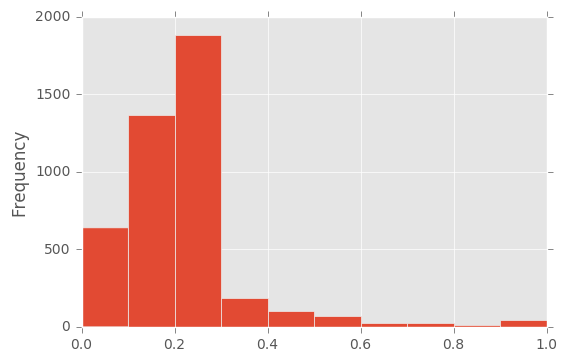

In [58]:
matches['win_contribution'].plot(kind = 'hist')

In [62]:
matches[matches['match_id'] == '3051652031']

,Unnamed: 0,account_id,assists,attack_type_x,camps_stacked,cluster,creeps_stacked,deaths,denies,duration,first_blood_time,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,kills,last_hits,leagueid,leaguename,level,localized_name_x,match_id,player_slot,primary_attr_x,start_time,stuns,t_experience_cnt_10,t_experience_cnt_12,t_experience_cnt_15,t_experience_cnt_20,t_experience_cnt_25,t_experience_cnt_3,t_experience_cnt_30,t_experience_cnt_5,t_experience_cnt_8,t_gold_cnt_10,t_gold_cnt_12,t_gold_cnt_15,t_gold_cnt_20,t_gold_cnt_25,t_gold_cnt_3,t_gold_cnt_30,t_gold_cnt_5,t_gold_cnt_8,t_lasthits_cnt_10,t_lasthits_cnt_12,t_lasthits_cnt_15,t_lasthits_cnt_20,t_lasthits_cnt_25,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,team_id,tower_damage,win,xp_per_min,id_x,datetime,t_item_aether_lens,t_item_arcane_boots,t_item_black_king_bar,t_item_blade_mail,t_item_blink,t_item_boots,t_item_bottle,t_item_desolator,t_item_echo_sabre,t_item_force_staff,t_item_hand_of_midas,t_item_hurricane_pike,t_item_invis_sword,t_item_magic_wand,t_item_manta,...,localized_name_x_Ogre Magi,localized_name_x_Omniknight,localized_name_x_Oracle,localized_name_x_Outworld Devourer,localized_name_x_Phantom Assassin,localized_name_x_Phantom Lancer,localized_name_x_Phoenix,localized_name_x_Puck,localized_name_x_Pudge,localized_name_x_Pugna,localized_name_x_Queen of Pain,localized_name_x_Razor,localized_name_x_Riki,localized_name_x_Rubick,localized_name_x_Sand King,localized_name_x_Shadow Demon,localized_name_x_Shadow Fiend,localized_name_x_Shadow Shaman,localized_name_x_Silencer,localized_name_x_Skywrath Mage,localized_name_x_Slardar,localized_name_x_Slark,localized_name_x_Sniper,localized_name_x_Spectre,localized_name_x_Spirit Breaker,localized_name_x_Storm Spirit,localized_name_x_Sven,localized_name_x_Templar Assassin,localized_name_x_Terrorblade,localized_name_x_Tidehunter,localized_name_x_Timbersaw,localized_name_x_Tinker,localized_name_x_Tiny,localized_name_x_Treant Protector,localized_name_x_Troll Warlord,localized_name_x_Tusk,localized_name_x_Underlord,localized_name_x_Undying,localized_name_x_Ursa,localized_name_x_Vengeful Spirit,localized_name_x_Venomancer,localized_name_x_Viper,localized_name_x_Visage,localized_name_x_Warlock,localized_name_x_Weaver,localized_name_x_Windranger,localized_name_x_Winter Wyvern,localized_name_x_Witch Doctor,localized_name_x_Wraith King,localized_name_x_Zeus,primary_attr_x_agi,primary_attr_x_int,primary_attr_x_str,Carry_0,Carry_1,Disabler_0,Disabler_1,Durable_0,Durable_1,Escape_0,Escape_1,Initiator_0,Initiator_1,Jungler_0,Jungler_1,Nuker_0,Nuker_1,Pusher_0,Pusher_1,Support_0,Support_1,prediction,win_prob,cumulative_prob,win_contribution
3,2,106809101,3,Ranged,2.0,186,7.0,2,0,1274,163,437,7045,4282,210,58,3,71,5157,Kiev Major,12,Enchantress,3051652031,4,int,1489339762,14.129900,2002.0,2826.0,3862.0,5747.0,6869.0,213.0,12127.651605,555.0,1549.0,2020.0,3050.0,4713.0,7072.0,9295.0,258.0,11396.754044,683.0,1531.0,21.0,32.0,40.0,66.0,71.0,2.0,121.540693,8.0,15.0,1883502,577,True,323,3051652031_106809101,12.03.2017 20:29:22,1346.630952,675.751653,1476.191617,1199.365169,1097.616933,268.0,219.75817,1196.97619,1050.592233,1086.000000,941.321008,1115.000000,1182.322709,379.000000,1306.506812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,True,0.626739,4.193022,0.149472
4,336,134556694,6,Ranged,0.0,186,0.0,0,2,1274,163,316,4710,2974,0,86,0,42,5157,Kiev Major,12,Rubick,3051652031,0,int,1489339762,20.484600,1585.0,2215.0,3493.0,5505.0,7024.0,168.0,12127.651605,604.0,1321.0,1591.0,2151.0,3582.0,5545.0,6889.0,251.0,11396.754044,651.0,1309.0,9.0,9.0,16.0,37.0,42.0,2.0,121.540693,2.0,6.0,1883502,98,True,330,3051652031_134556694,12.03.2017 20:29:22,1346.630952,675.751653,1476.191617,1199.

In [70]:
matches['match_id'].unique().shape

(759L,)

In [85]:
matches.groupby(['match_id'])['match_id'].size().describe()

count    759.000000
mean       5.729908
std        2.135771
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max       10.000000
dtype: float64